In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import random
import shutil
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [7]:
df = pd.read_csv("Brain Tumor.csv")
df.head(5)

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [17]:
image_list = []
for idx, item in df.iterrows():
    name = "Brain Tumor/" + item['Image'] + ".jpg"
    target = item['Class']
    image_list.append([name, target])
print(image_list[:10])

[['Brain Tumor/Image1.jpg', 0], ['Brain Tumor/Image2.jpg', 0], ['Brain Tumor/Image3.jpg', 1], ['Brain Tumor/Image4.jpg', 1], ['Brain Tumor/Image5.jpg', 0], ['Brain Tumor/Image6.jpg', 0], ['Brain Tumor/Image7.jpg', 0], ['Brain Tumor/Image8.jpg', 0], ['Brain Tumor/Image9.jpg', 0], ['Brain Tumor/Image10.jpg', 1]]


In [20]:
positive = []
negative = []
for item in image_list:
    if item[1] == 1:
        positive.append(item)
    else:
        negative.append(item)
print(len(positive))
print(len(negative))

1683
2079


In [21]:
TRAIN_POS_DIR = 'Data/train/Positive'
TRAIN_NEG_DIR = 'Data/train/Negative'
TEST_POS_DIR = 'Data/test/Positive'
TEST_NEG_DIR = 'Data/test/Negative'

In [23]:
pos_sample = random.sample(positive, 1600)
neg_sample = random.sample(negative, 1600)
pos_train = random.sample(pos_sample, 1440)
neg_train = random.sample(neg_sample, 1440)
pos_test = [item for item in pos_sample if item not in pos_train]
neg_test = [item for item in neg_sample if item not in neg_train]

In [25]:
src_des = [[pos_train, TRAIN_POS_DIR], [neg_train, TRAIN_NEG_DIR], [pos_test, TEST_POS_DIR], [neg_test, TEST_NEG_DIR]]
for item in src_des:
    imglist = item[0]
    des = item[1]
    for img in imglist:
        src = img[0]
        shutil.copy(src, des)

In [84]:
TRAIN_DATA = 'Data/train'
VAL_DATA = 'Data/test'
image_datagen = ImageDataGenerator(rescale = 1./255)

train_gen = image_datagen.flow_from_directory(TRAIN_DATA,
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              target_size = (240, 240))

val_gen = image_datagen.flow_from_directory(VAL_DATA,
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              target_size = (240, 240))

Found 2880 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [85]:
model = Sequential()
model.add(Conv2D(8, (3,3), padding='same', activation='tanh', input_shape=(240, 240, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 240, 240, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 120, 120, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 60, 60, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1

In [86]:
model.compile(optimizer=SGD(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [87]:
history = model.fit(train_gen,
                    epochs = 20,
                    verbose = 1,
                    validation_data = val_gen
                   )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 10 steps
Epoch 1/20
90/90 [==============================] - 112s 1s/step - loss: 0.6787 - accuracy: 0.6333 - val_loss: 0.6548 - val_accuracy: 0.7969
Epoch 2/20
90/90 [==============================] - 104s 1s/step - loss: 0.6387 - accuracy: 0.7618 - val_loss: 0.6132 - val_accuracy: 0.8031
Epoch 3/20
90/90 [==============================] - 99s 1s/step - loss: 0.6020 - accuracy: 0.7635 - val_loss: 0.5716 - val_accuracy: 0.8031
Epoch 4/20
90/90 [==============================] - 100s 1s/step - loss: 0.5667 - accuracy: 0.7691 - val_loss: 0.5321 - val_accuracy: 0.8000
Epoch 5/20
90/90 [==============================] - 113s 1s/step - loss: 0.5383 - accuracy: 0.7681 - val_loss: 0.5027 - val_accuracy: 0.8125
Epoch 6/20
90/90 [==============================] - 112s 1s/step - loss: 0.5196 - accuracy: 0.7681 - val_loss: 0.4834 - val_accuracy: 0.8156
Epoch 7/20
90/90 [==============================] - 121s 1s/ste

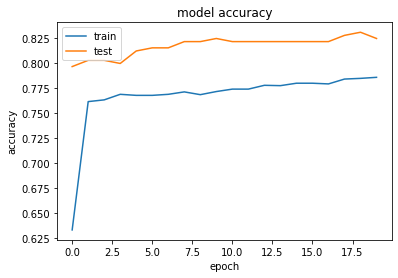

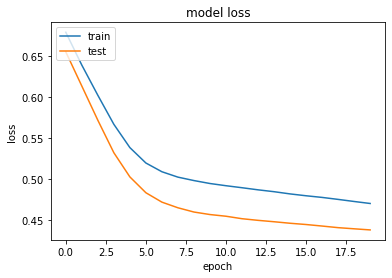

In [91]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [92]:
model.save("model-v2-from-image.h5")

In [83]:
tf.keras.backend.clear_session()

In [95]:
model2 = Sequential()
model2.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model2.add(Conv2D(64, (3,3), activation='relu', padding='same'))
#first pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3,3), activation='relu', padding='same'))
#second pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3,3), activation='relu', padding='same'))
#third pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
#fourth pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model2.add(Conv2D(512, (3,3), activation='relu', padding='same'))
#fifth pooling
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(4096, activation='relu'))
model2.add(Dense(2, activation='softmax'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 56, 56, 256)      

In [96]:
model2.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [97]:
train_datagen = image_datagen.flow_from_directory(TRAIN_DATA,
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              target_size = (240, 240))

val_datagen = image_datagen.flow_from_directory(VAL_DATA,
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              target_size = (240, 240))

Found 2880 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [ ]:
history2 = model2.fit(train_datagen,
                      epochs = 20,
                      verbose = 1,
                      validation_data = val_datagen)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 90 steps, validate for 10 steps
Epoch 1/20
 1/90 [..............................] - ETA: 2:16:09 - loss: 0.6931 - accuracy: 0.5000